Part 1: Creating the GitHub Repo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# Fetching the dataset 
automobile = fetch_ucirepo(id=10)

In [2]:
# Overview of the entire automobile dataset
automobile.data.features

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


Part 2: Performing Initial EDA, Data Wrangling and Pre-Processing 

In [3]:
print("\nSample of the Dataset:")
print(automobile.data.features.sample(5))

# More to come.


Sample of the Dataset:
       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
20    6575.0           43        38    5400.0        70.0                9.6   
105  19699.0           23        17    5200.0       200.0                7.8   
201  19045.0           25        19    5300.0       160.0                8.7   
87    9279.0           30        23    5500.0       116.0                7.5   
131   9895.0           31        23       NaN         NaN                8.7   

     stroke  bore fuel-system  engine-size  ...  length wheel-base  \
20     3.11  3.03        2bbl           90  ...   158.8       94.5   
105    3.27  3.43        mpfi          181  ...   170.7       91.3   
201    3.15  3.78        mpfi          141  ...   188.8      109.1   
87     3.46  3.17        spdi          110  ...   172.4       96.3   
131    3.90  3.46        mpfi          132  ...   176.8       96.1   

     engine-location  drive-wheels  body-style  num-of-doors  aspiration  

In [4]:
# Check data types and missing values

print("\nData Types:")
print(automobile.data.features.dtypes)


Data Types:
price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object


In [5]:
# Checking the missing values as listed on the UCI website

print("\nMissing Values:")
print(automobile.data.features.isnull().sum())


Missing Values:
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64


In [6]:
# Summary statistics

print("\nSummary Statistics:")
print(automobile.data.features.describe(include='all'))


Summary Statistics:
               price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count     201.000000   205.000000  205.000000   203.000000  203.000000   
unique           NaN          NaN         NaN          NaN         NaN   
top              NaN          NaN         NaN          NaN         NaN   
freq             NaN          NaN         NaN          NaN         NaN   
mean    13207.129353    30.751220   25.219512  5125.369458  104.256158   
std      7947.066342     6.886443    6.542142   479.334560   39.714369   
min      5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%      7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%     10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%     16500.000000    34.000000   30.000000  5500.000000  116.000000   
max     45400.000000    54.000000   49.000000  6600.000000  288.000000   

        compression-ratio      stroke        bore fuel-system  engine-size  \
count       

In [7]:
print("\nUnique Values in the Columns:")
categorical_columns = automobile.variables[automobile.variables['type'] == 'Categorical']['name'].tolist()
for column in categorical_columns:
    print(column, ":")
    print(automobile.data.features[column].value_counts())
    print("\n")


Unique Values in the Columns:
fuel-system :
fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


engine-type :
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


drive-wheels :
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


body-style :
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


make :
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1

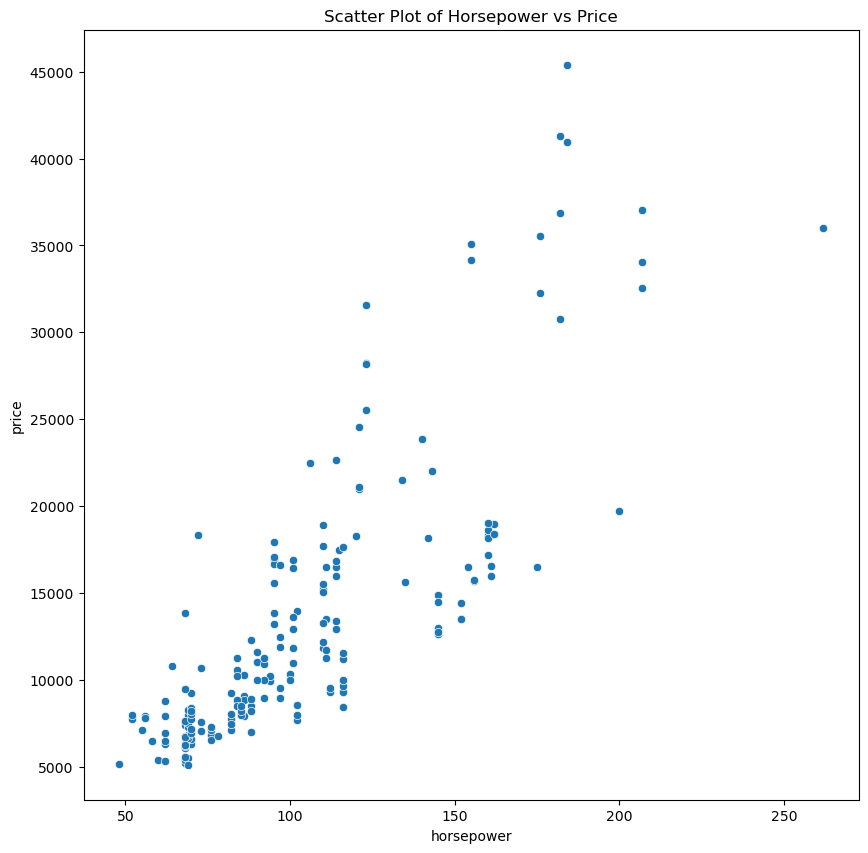

In [8]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=automobile.data.features['horsepower'], y=automobile.data.features['price'])
plt.title('Scatter Plot of Horsepower vs Price')
plt.show()

In [9]:
# Handle missing values
# Replacing missing values in 'normalized-losses' with the mean (122.0)
automobile.data.features.loc[:, 'normalized-losses'] = automobile.data.features['normalized-losses'].fillna(automobile.data.features['normalized-losses'].mean())

In [10]:
automobile.data.features['normalized-losses'].mean()

122.0